In [2]:
import pandas as pd

In [3]:
gold = pd.read_csv('monthly_csv.csv', parse_dates=True)

In [4]:
gold.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [5]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [5]:
gold['Date'] = pd.DatetimeIndex(gold['Date'])

In [6]:
gold.head()

,Date,Price
0,1950-01-01,34.73
1,1950-02-01,34.73
2,1950-03-01,34.73
3,1950-04-01,34.73
4,1950-05-01,34.73


In [7]:
import matplotlib.pyplot as plt

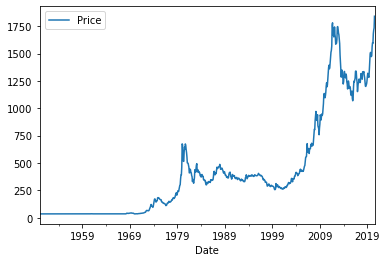

In [9]:
gold.plot(x='Date')
plt.show()

In [10]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    847 non-null    datetime64[ns]
 1   Price   847 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB


In [43]:
gold.columns = ['ds', 'y']

In [44]:
gold.head()

,ds,y
0,1950-01-01,34.73
1,1950-02-01,34.73
2,1950-03-01,34.73
3,1950-04-01,34.73
4,1950-05-01,34.73


In [45]:
from prophet import Prophet

In [46]:
model = Prophet(interval_width=0.95)

In [47]:
model.fit(gold)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\xegah\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [48]:
gold.head()

,ds,y
0,1950-01-01,34.73
1,1950-02-01,34.73
2,1950-03-01,34.73
3,1950-04-01,34.73
4,1950-05-01,34.73


In [56]:
future_df = model.make_future_dataframe(periods=200, freq='M')
future_df.tail()

,ds
1042,2036-10-31
1043,2036-11-30
1044,2036-12-31
1045,2037-01-31
1046,2037-02-28


In [57]:
forecast_df = model.predict(future_df)
forecast_df.head()

C:\Users\xegah\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\xegah\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1950-01-01,27.971944,-246.057927,285.528072,27.971944,27.971944,-7.971658,-7.971658,-7.971658,-7.971658,-7.971658,-7.971658,0.0,0.0,0.0,20.000285
1,1950-02-01,28.086497,-223.735450,301.200241,28.086497,28.086497,-8.087016,-8.087016,-8.087016,-8.087016,-8.087016,-8.087016,0.0,0.0,0.0,19.999480
2,1950-03-01,28.189964,-242.009642,287.196327,28.189964,28.189964,-12.365636,-12.365636,-12.365636,-12.365636,-12.365636,-12.365636,0.0,0.0,0.0,15.824328
3,1950-04-01,28.304517,-255.699151,258.003214,28.304517,28.304517,-10.109943,-10.109943,-10.109943,-10.109943,-10.109943,-10.109943,0.0,0.0,0.0,18.194574
4,1950-05-01,28.415374,-237.279252,291.797864,28.415374,28.415374,-8.647760,-8.647760,-8.647760,-8.647760,-8.647760,-8.647760,0.0,0.0,0.0,19.767614


In [58]:
forecast_df.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1042,2036-10-31,2775.113272,2357.171627,3144.792897,2445.431604,3108.048829,-20.458006,-20.458006,-20.458006,-20.458006,-20.458006,-20.458006,0.0,0.0,0.0,2754.655266
1043,2036-11-30,2780.715103,2334.657501,3205.793512,2448.747797,3115.700296,-19.513008,-19.513008,-19.513008,-19.513008,-19.513008,-19.513008,0.0,0.0,0.0,2761.202095
1044,2036-12-31,2786.503662,2390.795323,3250.069068,2452.174529,3123.606811,7.670534,7.670534,7.670534,7.670534,7.670534,7.670534,0.0,0.0,0.0,2794.174195
1045,2037-01-31,2792.292220,2396.127885,3265.560102,2455.601261,3131.462688,27.931899,27.931899,27.931899,27.931899,27.931899,27.931899,0.0,0.0,0.0,2820.224120
1046,2037-02-28,2797.520596,2331.170948,3170.144500,2458.698699,3138.558229,-49.195497,-49.195497,-49.195497,-49.195497,-49.195497,-49.195497,0.0,0.0,0.0,2748.325099


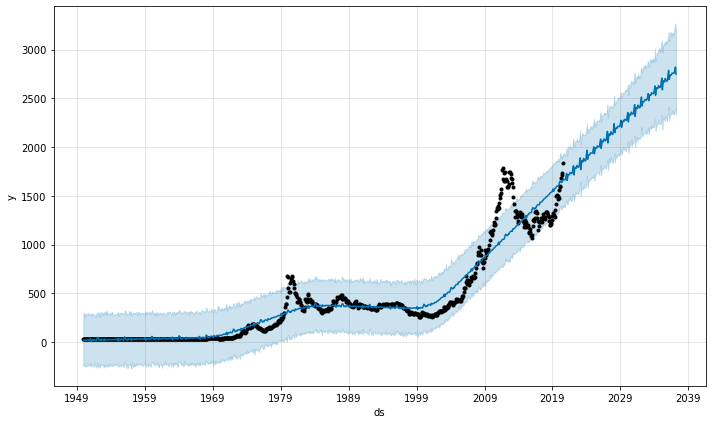

In [59]:
fig1 = model.plot(forecast_df)


C:\Users\xegah\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


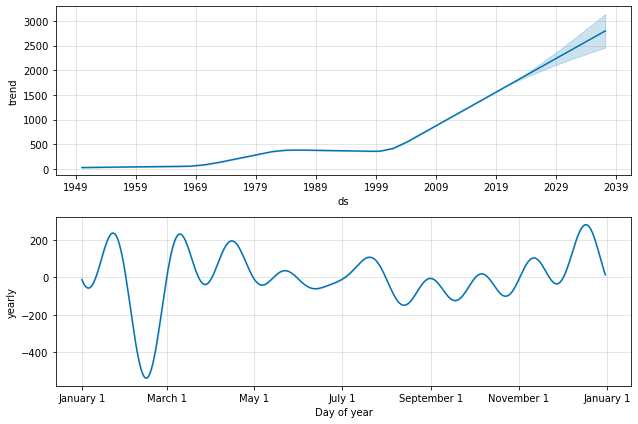

In [62]:
fig2 = model.plot_components(forecast_df)